In [3]:
import folium
from folium import plugins

# 读取GeoJSON数据
geojson_data = 'testdata.geojson'

# 定义颜色区间和图例标签
colors = ['green', 'yellow', 'orange', 'red']
legend_labels = ['Low', 'Moderate', 'High', 'Very High']

# 创建地图对象
m = folium.Map(location=[37, 113], zoom_start=10)

# 创建Choropleth图层，将面数据着色
folium.Choropleth(
    geo_data=geojson_data,
    fill_color='YlGn',
    fill_opacity=0.2,
    line_opacity=1,
    key_on='feature.properties.vegetable',
    data=None,
    legend_name='Vegetation',
    bins=[0, 25, 50, 75, 400],  # 根据数据分成的区间
    colors=colors,
).add_to(m)

# 添加图例
folium.LayerControl(collapsed=False).add_to(m)

# 添加指北针
minimap = plugins.MiniMap()
m.add_child(minimap)

# 添加比例尺
# folium.plugins.ScaleControl().add_to(m)
# 显示地图
m

In [4]:
import pandas
import requests

state_geo = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()
state_data = pandas.read_csv(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_unemployment_oct_2012.csv"
)

m = folium.Map(location=[48, -102], 
               zoom_start=3, 
               tiles='Stamen Terrain',
               zoom_control=False,
               control_scale=True)
# blank_tile_layer = folium.TileLayer(tiles='', attr='')

# 将空白底图图层添加到地图上
# blank_tile_layer.add_to(m)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
    bins=[0, 3, 6, 9, 12]
).add_to(m)

# folium.LayerControl().add_to(m)
m

<Axes: >

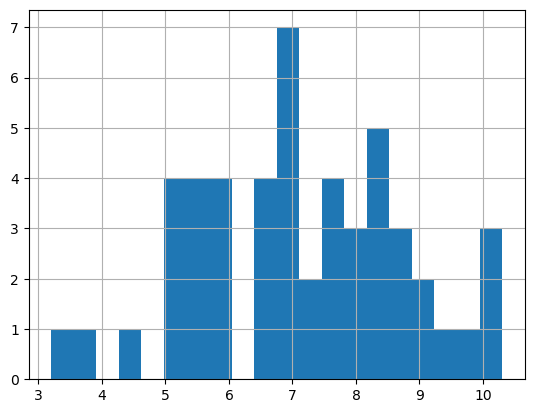

In [5]:
state_data["Unemployment"].hist(bins=20)


In [6]:
df = geopandas.read_file("/Users/zowcool/Desktop/test.geojson")
df

NameError: name 'geopandas' is not defined

In [7]:
df = geopandas.read_file('/Users/zowcool/Downloads/Currentweatherreport_GEOJSON/current_weather_report_hong_kong.json')
df

NameError: name 'geopandas' is not defined

In [8]:
world.head(20)

NameError: name 'world' is not defined

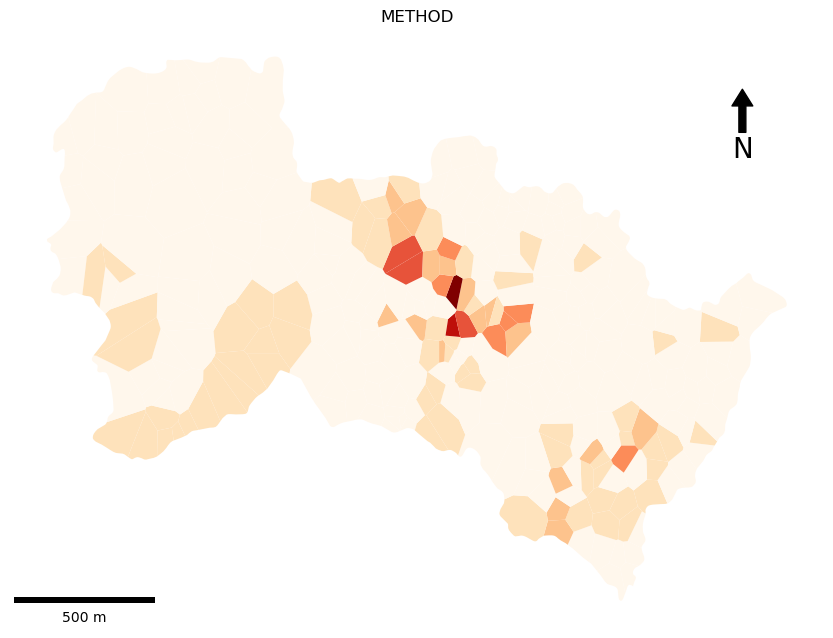

In [9]:
import geopandas
import matplotlib.pyplot as plt
import mapclassify
from matplotlib_scalebar.scalebar import ScaleBar
world = geopandas.read_file('testdata.geojson')
# ei = mapclassify.EqualInterval(world['vegetable'], k=5)
ei = mapclassify.HeadTailBreaks(world['vegetable'])
world['category'] = ei.yb
ax = world.plot(column='category', 
                legend=False, 
                # legend_kwds={'loc': 'lower right'}, 
                cmap='OrRd', 
                figsize=(10.5, 10))
ax.add_artist(ScaleBar(3, units="km", location="lower left"))
ax.set_xticks([], None)
ax.set_yticks([], None)
plt.title("METHOD")
ax.set_axis_off()
x, y, arrow_length = 0.9, 0.9, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
plt.show()

In [10]:
world.head()

,ID,NAME,CODE,fruit,vegetable,corn,oil,herb,total_food,均值,...,GDP,doctor,fertilizer,soil,elevation,river,road,birth,geometry,category
0,1,松沟,02010,0.0,9.0,124.0,13.03,443.0,140.3905,95.1716,...,3.7003,1.0,20.0,20,1400.00,6,6,14,"MULTIPOLYGON (((113.73731 37.09375, 113.74315 ...",0
1,2,夫子岭,03022,0.0,20.0,161.0,2.74,155.0,500.3170,95.1716,...,5.8980,1.0,46.0,20,1300.00,4,4,31,"MULTIPOLYGON (((113.75898 37.09599, 113.75844 ...",0
2,3,大发沟,08039,0.0,7.0,130.0,1.54,283.0,147.8025,95.1716,...,4.0223,1.0,37.0,20,1300.00,2,4,24,"MULTIPOLYGON (((113.76248 37.11284, 113.76247 ...",0
3,4,后营,07006,0.0,5.0,42.0,0.83,119.0,59.4050,95.1716,...,3.4298,1.0,80.0,20,1276.92,4,4,23,"MULTIPOLYGON (((113.74071 37.11888, 113.74364 ...",0
4,5,前营,03051,0.0,21.0,26.0,12.54,170.0,43.1030,95.1716,...,2.2581,1.0,23.0,20,1222.04,4,6,33,"MULTIPOLYGON (((113.73260 37.12031, 113.72406 ...",0


Text(0.5, 0, 'Vegetable Production')

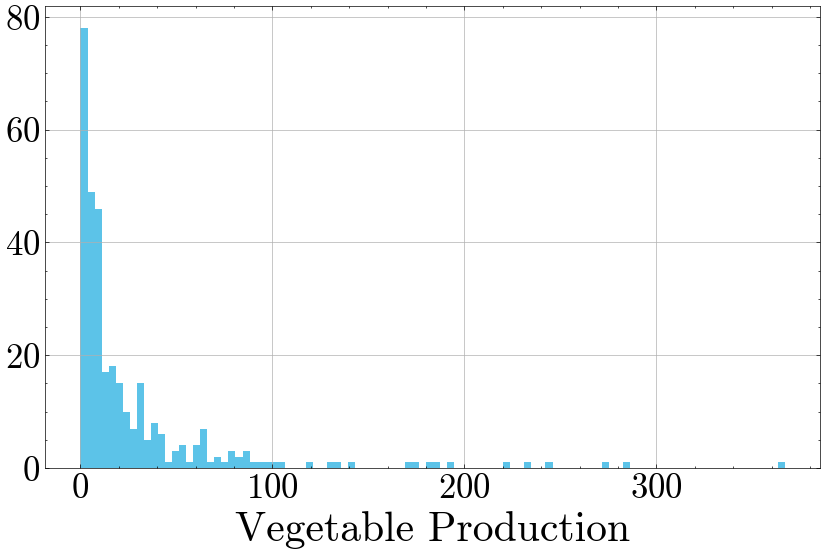

In [64]:
plt.figure(figsize=(10,6))
world.vegetable.hist(bins=100, color=["#5cc3e8"])
plt.xlabel("Vegetable Production")

In [12]:
world.describe()

,ID,fruit,vegetable,corn,oil,herb,total_food,均值,方差,NTDS_rate,GDP,doctor,fertilizer,soil,elevation,river,road,birth,category
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,163.500000,1.484663,27.274509,93.950920,4.105031,208.561350,142.326396,33.524713,233.492742,0.023367,9.070910,0.711656,29.865031,10.975460,1393.018129,3.650307,3.447853,24.141104,0.423313
std,94.252321,10.550891,46.788476,99.885214,7.913370,152.995729,139.298511,47.172999,361.488697,0.058355,36.883058,1.327688,30.434902,6.833358,139.596238,2.361313,2.114138,28.672448,0.851393
min,1.000000,0.000000,0.000000,7.000000,0.000000,7.000000,10.453333,0.000000,0.000000,0.000000,0.472100,0.000000,1.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,82.250000,0.000000,4.000000,34.000000,0.660000,113.250000,53.762500,0.000000,0.000000,0.000000,3.073175,0.000000,11.000000,7.000000,1300.000000,2.000000,2.000000,7.000000,0.000000
50%,163.500000,0.000000,10.000000,63.000000,1.600000,172.000000,94.020417,0.000000,0.000000,0.000000,4.989900,1.000000,21.000000,7.000000,1400.000000,2.000000,2.000000,14.000000,0.000000
75%,244.750000,0.000000,30.000000,109.000000,3.315000,276.750000,173.753875,95.171600,368.928000,0.021700,8.149250,1.000000,37.000000,20.000000,1487.807500,4.000000,4.000000,31.000000,1.000000
max,326.000000,173.000000,367.000000,674.000000,63.580000,1519.000000,798.472000,109.396000,896.187000,0.500000,634.667000,21.000000,294.000000,27.000000,1700.000000,12.000000,12.000000,181.000000,6.000000


‘box_plot’, ‘equal_interval’, ‘fisher_jenks’, ‘fisher_jenks_sampled’, ‘headtail_breaks’, ‘jenks_caspall’, ‘jenks_caspall_forced’, ‘jenks_caspall_sampled’, ‘max_p_classifier’, ‘maximum_breaks’, ‘natural_breaks’, ‘quantiles’, ‘percentiles’, ‘std_mean’ or ‘user_defined’)

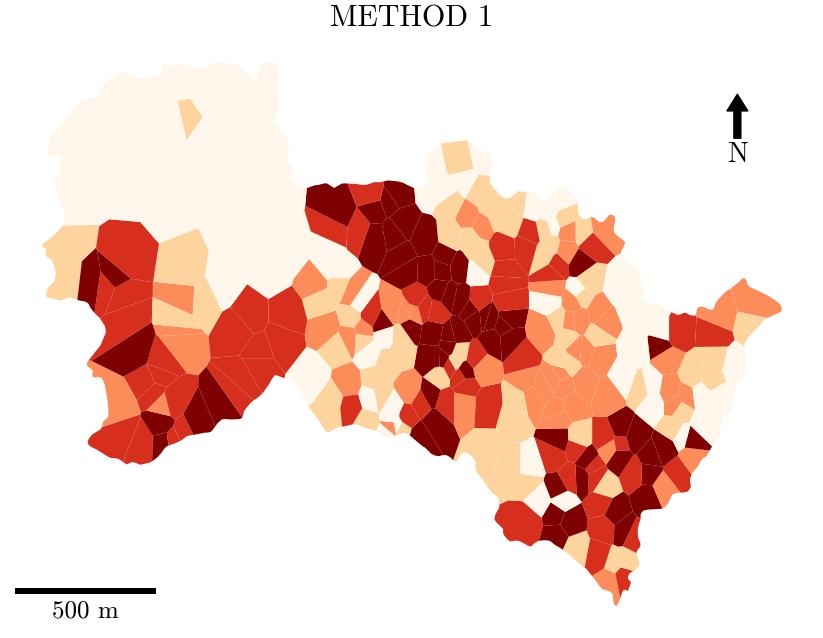

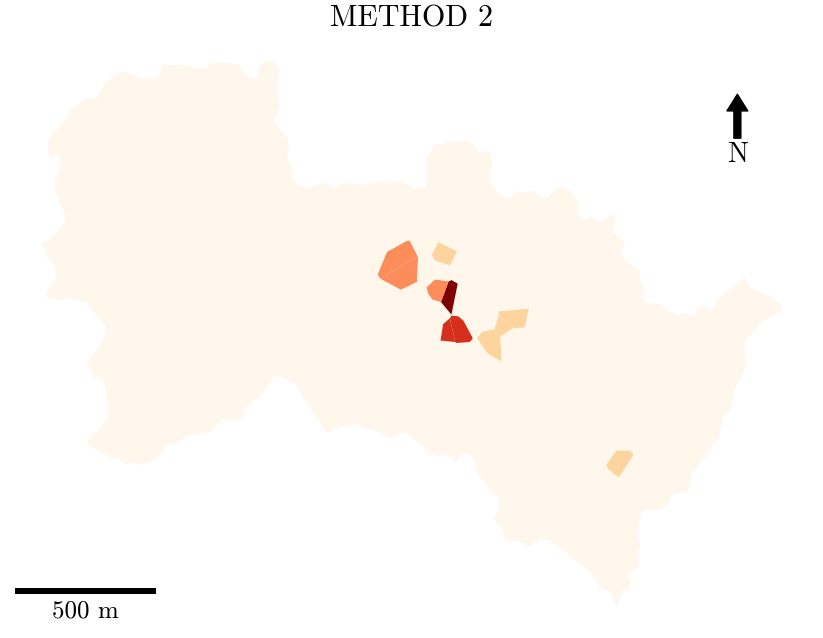

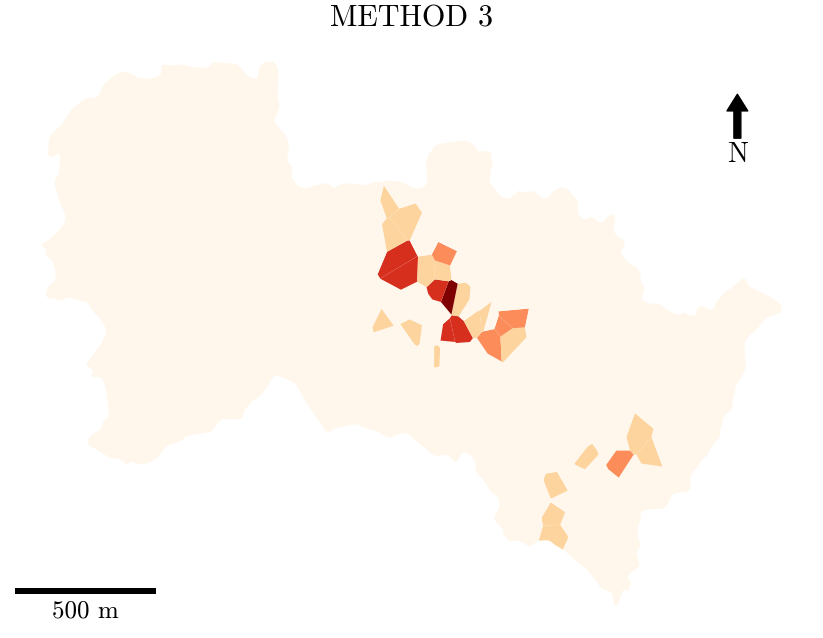

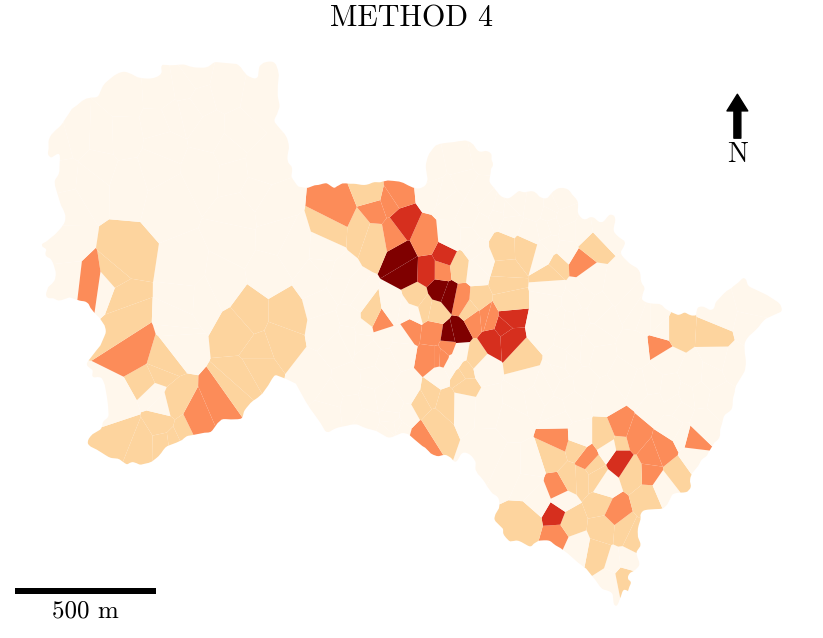

In [68]:
world = geopandas.read_file('testdata.geojson')
classifyMethods = ["quantiles","maximum_breaks", "equal_interval", "natural_breaks"]
def plotMap(df, col, sche, index):
    ax = df.plot(column= col, 
                    legend=False, 
                    legend_kwds={'loc': 'lower right'}, 
                    cmap='OrRd', 
                    scheme=sche,
                    # scheme_kwds={"k": 5},
                    figsize=(10.5, 10))
    ax.add_artist(ScaleBar(3, units="km", location="lower left"))
    ax.set_xticks([], None)
    ax.set_yticks([], None)
    plt.title("METHOD {}".format(i + 1))
    x, y, arrow_length = 0.9, 0.9, 0.1
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
    ax.set_axis_off()
    plt.show()

for i, s in enumerate(classifyMethods):
    plotMap(world, "vegetable", s, i)

In [4]:
qdata = pd.read_excel("qData2.xlsx")
# qdata = qdata[qdata["map_exp"] == 2]
testDf = qdata[["method1_1", "method2_1", "method3_1", "method4_1"]]
testDf = testDf.melt()
testDf

,variable,value
0,method1_1,3
1,method1_1,5
2,method1_1,4
3,method1_1,5
4,method1_1,4
...,...,...
483,method4_1,4
484,method4_1,4
485,method4_1,3
486,method4_1,3


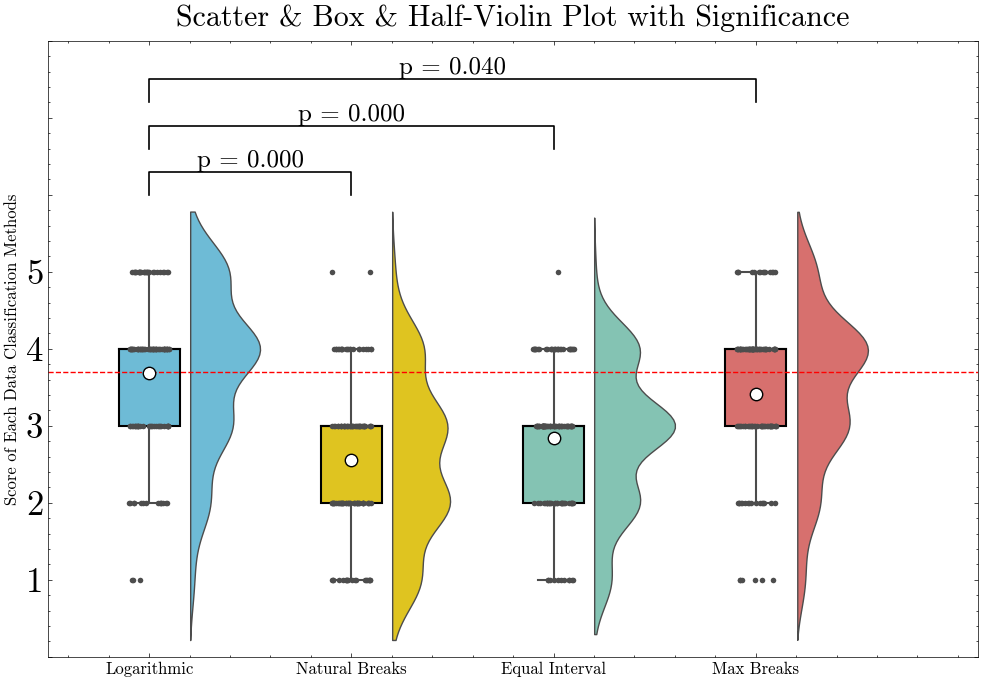

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import scienceplots
#格式
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator

plt.style.use(['science', 'no-latex'])
import warnings
warnings.filterwarnings('ignore') 
linewidth=3
alpha=0.8

font_prop_legend= FontProperties(family='Times New Roman')
fontdict_legend={'family': 'Times New Roman', 'size': 15}
# Set global font size
mpl.rcParams['font.size'] =18
# Set global font size for labels
mpl.rcParams['axes.labelsize'] = 30
# Set global font size for tick labels
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 25
mpl.rcParams['legend.fontsize'] = 25
#mpl.rcParams['figure.figsize'] = (20.35,10)# For 公众号
# Reproducing the provided code to create the data and the plot

np.random.seed(0)
n = 40  # number of observations per group
groups = ['method1_1', 'method2_1', 'method3_1', 'method4_1']

df = pd.DataFrame({
    'group': np.repeat(groups, n),
    'value': (np.random.randn(n * len(groups)) * 20) + 50
})


df.loc[df['group'] == 'Yiru', 'value'] += 10
df.loc[df['group'] == 'Dili', 'value'] -= 10
df.loc[df['group'] == 'Shensi', 'value'] += 20
df.loc[df['group'] == 'Hai', 'value'] += 30

plt.figure(figsize=(12, 8))
palette = ["#5cc3e8","#ffdb00","#79ceb8","#e95f5c"]
violin_parts = sns.violinplot(x='variable', y='value', data=testDf, split=True, inner=None,
                              palette=palette)

shift = 0.2# 平移小提琴

# The code intended to modify the violin patches to keep only the left half
for vp in violin_parts.collections[::1]:  
    for path in vp.get_paths():
        vertices = path.vertices
        #vertices[:, 0] = np.clip(vertices[:, 0], -np.inf, np.median(vertices[:, 0]))
        '''
        意味着在每个小提琴图的 Path 对象中，所有路径顶点的 x 坐标都被“剪切”到无穷小和 x 坐标中值的范围内。
        换句话说，保留路径的左半部分
        因为任何大于中值的 x 坐标都被设置为中值，从而删除了小提琴图的右侧。
        '''
        vertices[:, 0] = np.clip(vertices[:, 0], np.median(vertices[:, 0]), np.inf)#相反,删除左半边

        # Apply the horizontal shift to the right half
        vertices[:, 0] += shift  # Shift to the right

sns.boxplot(x='variable', y='value', data=testDf, width=0.3, fliersize=0, linewidth=1.5,
            boxprops={'edgecolor': 'black'}, palette=palette, showcaps=True, whiskerprops={'linewidth':1.5},
            capprops={'linewidth':1.5}, medianprops={'color':'black'})

'''
Seaborn的boxplot函数默认绘制中位数
但不绘制均值。要在箱形图中添加均值
可以使用pointplot或直接在matplotlib中添加点'''
# Calculate the mean values for each group
mean_values = testDf.groupby('variable')['value'].mean().values

# Add the mean values to the boxplot using plt.scatter
plt.scatter(groups, mean_values, color='white', edgecolor='black',s=80, zorder=5)

sns.stripplot(x='variable', y='value', data=testDf, jitter=True, size=4, color=".3", linewidth=0)

# plt.axhline(y=0, linestyle='--', color='red', linewidth=1)
plt.axhline(y=3.7, linestyle='--', color='red', linewidth=1)

y, h, col = testDf['value'].max() + 1, 0.3, 'k'

# y 为当前数据值的最大值加上5，这是为了确定在哪个高度上绘制显著性标记。
# h 是每一对比较之间的高度差，用来确保标记不会重叠。
#col 是用来绘制线条和文字的颜色（在这里是黑色）

pairs = [('method1_1', 'method2_1'), ('method1_1', 'method3_1'), ('method1_1', 'method4_1')]
#创建一个比较对的列表 pairs。这里的意思是将组 A 与组 B、组 A 与组 C、以及组 A与组 D 进行比较。

for i, (group1, group2) in enumerate(pairs):
    group1_values = testDf[testDf['variable'] == group1]['value']
    group2_values = testDf[testDf['variable'] == group2]['value']
    _, p_value = ttest_ind(group1_values, group2_values)
    

    if p_value < 0.9:
        x1, x2 = groups.index(group1), groups.index(group2)
        
        plt.plot([x1, x1, x2, x2], [y + (h*i), y + h + (h*i), y + h + (h*i), y + (h*i)], lw=1.2, c=col)
        plt.text((x1+x2)*.5, y+h+(h*i), f'p = {p_value:.3f}', ha='center', va='bottom', color=col)

    y += h

plt.ylim(0, 8)
# sns.despine()#边框可见性

plt.title('Scatter & Box & Half-Violin Plot with Significance',y=1.01)

plt.xlim(-0.50,4.1)
plt.xlabel('')
plt.ylabel('Score of Each Data Classification Methods', fontsize=12)
plt.xticks([0,1,2,3], ["Logarithmic", "Natural Breaks", "Equal Interval", "Max Breaks"], fontsize=12)
plt.yticks([0,1,2,3,4,5,6,7,8], [None,1,2,3,4,5,None, None, None])
plt.subplots_adjust()
plt.show()

In [22]:
qdata.head()

,ID,time,duration,source,ip,gender,age,job,map_exp,method1_1,...,method2_4,method3_4,method4_4,continuous,categorical,population,vegetation,GDP,So2,mapStyle
0,4,2023/11/10 18:23:47,113秒,微信,158.132.13.118(香港-未知),1,2,17,1,3,...,5,3,3,1,2.0,2,1,1,2,1
1,5,2023/11/10 18:23:48,76秒,微信,116.30.148.30(广东-深圳),1,2,17,1,5,...,4,4,4,2,2.0,2,1,2,2,1
2,6,2023/11/10 18:26:09,142秒,微信,158.132.13.138(香港-未知),1,2,17,1,4,...,4,1,3,1,2.0,2,1,2,1,1
3,7,2023/11/10 18:27:20,400秒,微信,158.132.12.156(香港-九龙),1,2,17,1,5,...,5,4,5,1,NaN,2,1,1,2,1
4,8,2023/11/10 18:27:38,338秒,微信,158.132.12.130(香港-九龙),1,2,17,2,4,...,5,4,4,1,1.0,2,1,2,1,1


<Axes: >

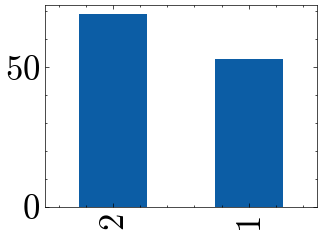

In [21]:
qdata["gender"].value_counts().plot(kind="bar")

<Axes: >

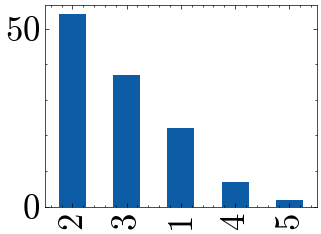

In [23]:
qdata["age"].value_counts().plot(kind="bar")

<Axes: >

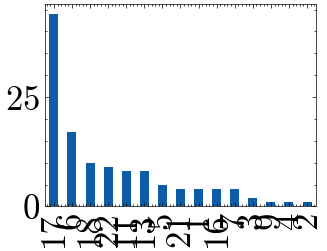

In [24]:
qdata["job"].value_counts().plot(kind="bar")

<Axes: >

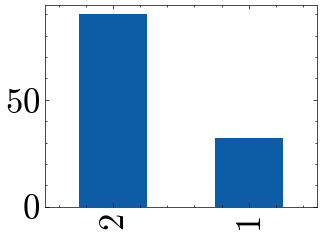

In [33]:
qdata["map_exp"].value_counts().plot(kind="bar")

In [38]:
import pingouin as pg
result = pg.cronbach_alpha(data = qdata[['method1_1', 'method2_1', 'method3_1', 'method4_1', 
                                         'method1_2', 'method2_2', 'method3_2', 'method4_2',
                                         'method1_3', 'method2_3', 'method3_3', 'method4_3',
                                         'method1_4', 'method2_4', 'method3_4', 'method4_4']])
print(result)

(0.8788509179469614, array([0.845, 0.908]))


<Axes: >

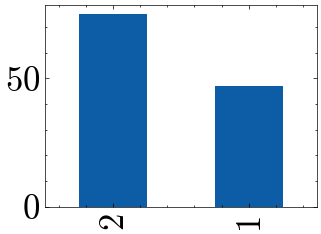

In [39]:
qdata["continuous"].value_counts().plot(kind="bar")

<Axes: >

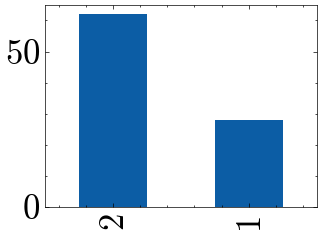

In [46]:
qdata[qdata["map_exp"] == 2]["continuous"].value_counts().plot(kind="bar")

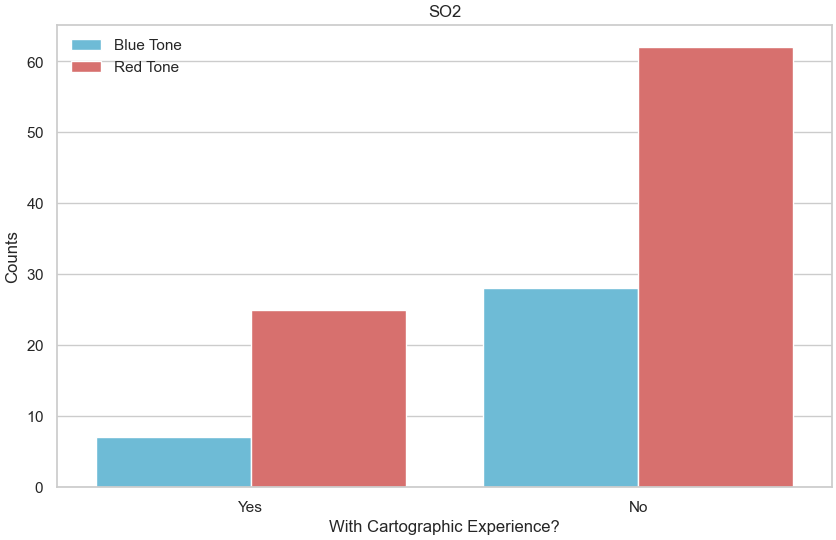

In [141]:
mapEXp = qdata[["map_exp", "continuous","categorical", "population", "vegetation",	"GDP",	"So2",	"mapStyle"]]
col = "So2"
mapEXp[col] = mapEXp[col].map({1: 'Blue Tone', 2: 'Red Tone'})
count_data = mapEXp.groupby(['map_exp', col]).size().reset_index(name='Count')
sns.set(style="whitegrid")

# Create the side-by-side bar plots
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='map_exp', y='Count', hue=col, data=count_data, palette=["#5cc3e8","#e95f5c"])

# Add labels and title
plt.xlabel('With Cartographic Experience?')
plt.xticks([0, 1], ["Yes", "No"])
plt.ylabel('Counts')
plt.title("SO2")
plt.legend()

# Show the plot
plt.show()